In [3]:
library(Signac)
library(Seurat)
library(ggplot2)
library(patchwork)
library(speckle)
library(ggpubr)
library(Signac)
library(SeuratDisk)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



In [ ]:
data = readRDS(file = "/data/ATAC5/liucheng/Harmony_integrateATAC_zhikong_over.RDS")

In [42]:
data$predicted.id <- as.character(data$predicted.id)

In [43]:
table(data$predicted.id)


       AS DP neuron        EC       Enc        FB      GABA       GLU Microglia 
     3126        17       546        82       169      2000      7125       173 
       OD       OPC 
      977      1384 

In [44]:
SaveH5Seurat(data, filename = "ATAC.h5Seurat",overwrite=T)
Convert("ATAC.h5Seurat",dest='h5ad',overwrite = T)

Creating h5Seurat file for version 3.1.5.9900

Adding counts for peaks

Adding data for peaks

Adding variable features for peaks

Adding feature-level metadata for peaks

Writing out ranges for peaks

Writing out motifs for peaks

Writing out fragments for peaks

Writing out seqinfo for peaks

Writing out annotation for peaks

Writing out bias for peaks

Writing out positionEnrichment for peaks

Writing out links for peaks

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA

Adding cell embeddings for lsi

Adding loadings for lsi

No projected loadings for lsi

Adding standard deviations for lsi

No JackStraw data for lsi

Adding cell embeddings for harmony_ATAC

No loadings for harmony_ATAC

No projected loadings for harmony_ATAC

Adding standard deviations for harmony_ATAC

No JackStraw data for harmony_ATAC

Adding cell embeddings for umap

No loadings for umap

No projected loadings for umap

No standard deviatio

In [49]:
table(data$ObjectName)
table(data$predicted.id)


P13_RN_CKO_M_1018003 P13_RN_CKO_M_1018004 P13_RN_CKO_M_1101004 
                4177                 3808                 2043 
 P13_RN_WT_M_1101005  P13_RN_WT_M_1101006 
                2830                 2741 


       AS DP neuron        EC       Enc        FB      GABA       GLU Microglia 
     3126        17       546        82       169      2000      7125       173 
       OD       OPC 
      977      1384 

In [31]:
prop_male <- propeller(clusters = data$predicted.id,
                  sample=data$ObjectName, group=data$treatment
                 )
head(prop_male)

Performing logit transformation of proportions

group variable has 2 levels, t-tests will be performed



,BaselineProp.clusters,BaselineProp.Freq,PropMean.CKO,PropMean.WT,PropRatio,Tstatistic,P.Value,FDR
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
OPC,OPC,0.088723636,0.098235359,0.068780770,1.4282387,3.9807677,0.01594261,0.1753687
OD,OD,0.062632220,0.053731053,0.085481492,0.6285694,-2.4412619,0.07229842,0.3976413
GLU,GLU,0.456760049,0.443336702,0.479765129,0.9240703,-1.7549166,0.15312115,0.5614442
EC,EC,0.035002244,0.036704212,0.028099930,1.3062030,1.1611327,0.31127652,0.6903456
Enc,Enc,0.005256747,0.006175383,0.001795468,3.4394280,1.1260214,0.32423316,0.6903456
DP neuron,DP neuron,0.001089813,0.001386320,0.000723924,1.9150073,0.9961152,0.37655217,0.6903456


Performing logit transformation of proportions



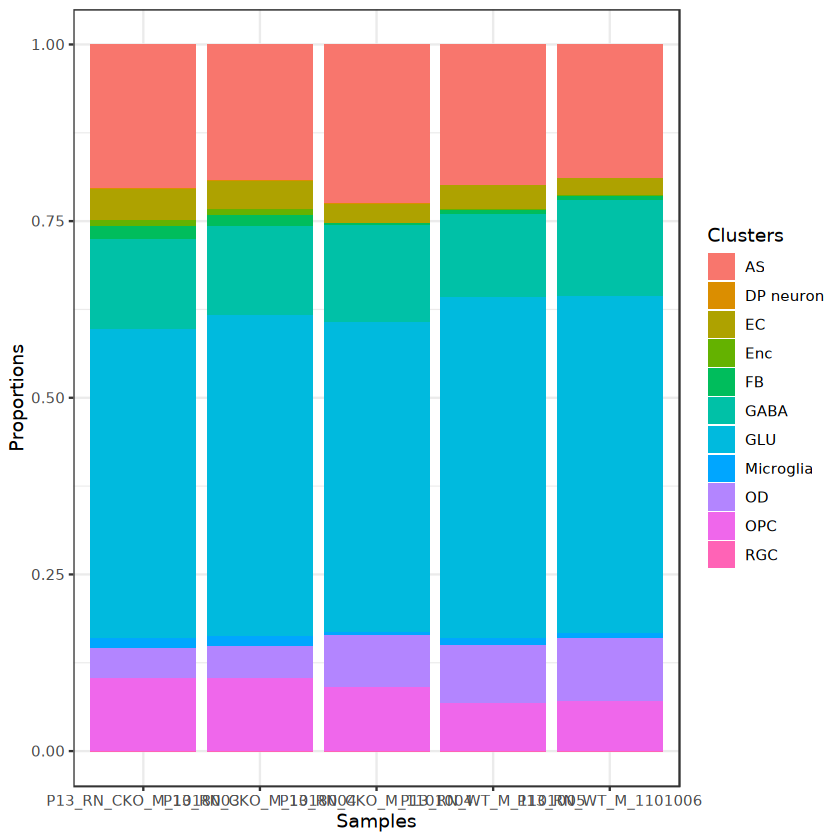

In [32]:
plotCellTypeProps(data,clusters = data$predicted.id, sample = data$ObjectName)+theme_bw()

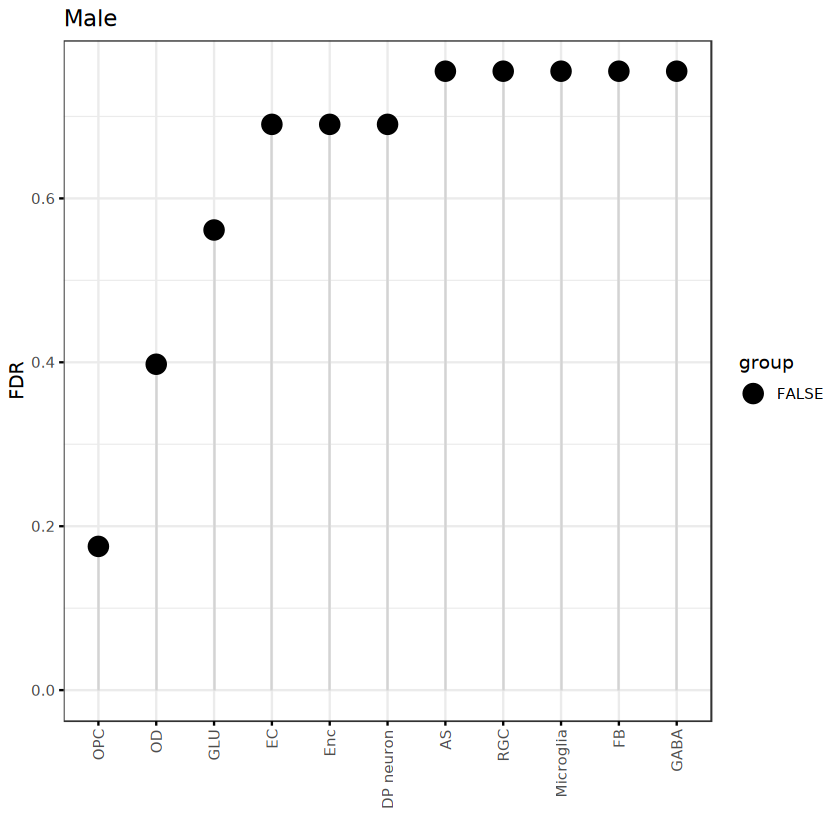

In [33]:
prop_male$group <- 'TRUE'
prop_male[prop_male$FDR > 0.05,]$group <- 'FALSE'
male_result_plot <- ggdotchart(prop_male, x = "BaselineProp.clusters", y = "FDR",
                            dot.size = 5,
                            color = "group",
                            palette = c("black", "red"), 
                            sorting = "ascending",
                            add = "segments",                             
                            ggtheme = theme_bw(),                        
                            xlab="",
                            panel.labs = c("FALSE","TRUE"),
                            title = "Male"
)
male_result_plot

In [34]:

data_2 = subset(x = data, ObjectName == "P13_RN_CKO_M_1101004",invert = TRUE)

In [35]:
table(data_2$ObjectName)


P13_RN_CKO_M_1018003 P13_RN_CKO_M_1018004  P13_RN_WT_M_1101005 
                4177                 3808                 2830 
 P13_RN_WT_M_1101006 
                2741 

Performing logit transformation of proportions



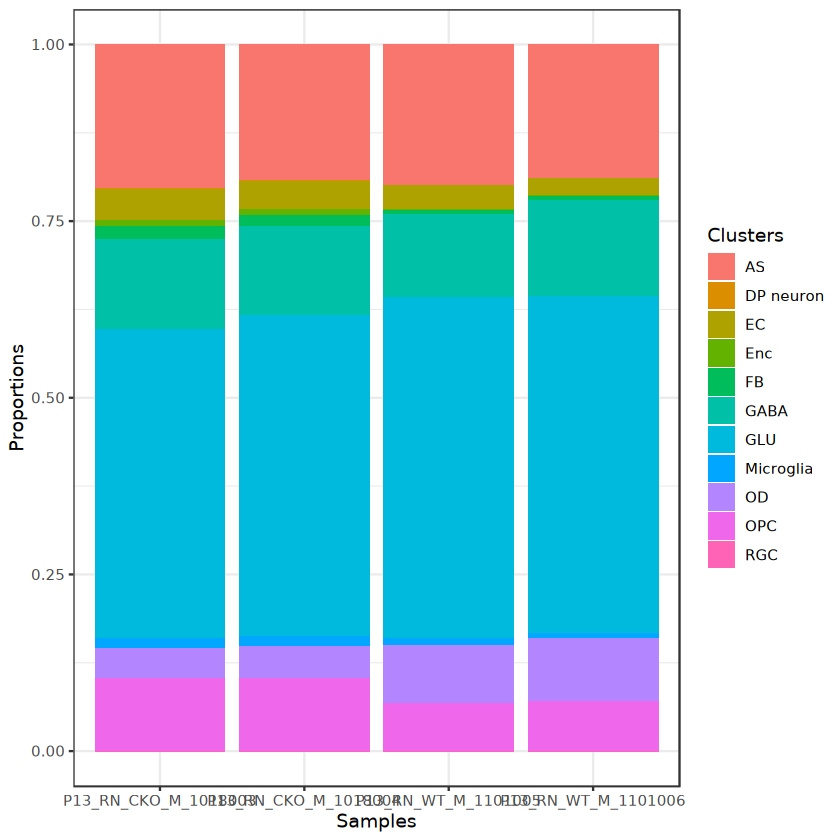

In [39]:
plotCellTypeProps(data_2,clusters = data_2$predicted.id, sample = data_2$ObjectName)+theme_bw()

Performing logit transformation of proportions

group variable has 2 levels, t-tests will be performed



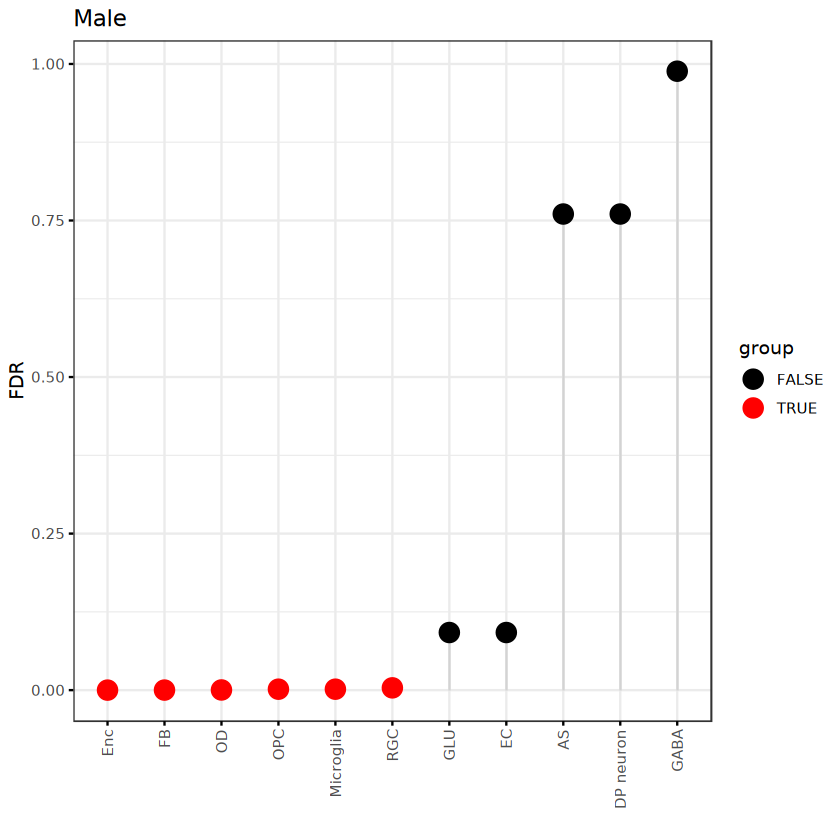

In [48]:
test <- propeller(clusters = data_2$predicted.id,
                  sample=data_2$ObjectName, group=data_2$treatment
                 )
test$group <- 'TRUE'
test[test$FDR > 0.05,]$group <- 'FALSE'
testplot <- ggdotchart(test, x = "BaselineProp.clusters", y = "FDR",
                            dot.size = 5,
                            color = "group",
                            palette = c("black", "red"), 
                            sorting = "ascending",
                            add = "segments",                             
                            ggtheme = theme_bw(),                        
                            xlab="",
                            panel.labs = c("FALSE","TRUE"),
                            title = "Male"
)
testplot

In [57]:
data_2$predicted.id <- as.character(data_2$predicted.id)

In [58]:
SaveH5Seurat(data_2, filename = "ATACtest.h5Seurat",overwrite=T)
Convert("ATACtest.h5Seurat",dest='h5ad',overwrite = T)

Warning message:
“Overwriting previous file ATACtest.h5Seurat”
Creating h5Seurat file for version 3.1.5.9900

Adding counts for peaks

Adding data for peaks

Adding variable features for peaks

Adding feature-level metadata for peaks

Writing out ranges for peaks

Writing out motifs for peaks

Writing out fragments for peaks

Writing out seqinfo for peaks

Writing out annotation for peaks

Writing out bias for peaks

Writing out positionEnrichment for peaks

Writing out links for peaks

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA

Adding cell embeddings for lsi

Adding loadings for lsi

No projected loadings for lsi

Adding standard deviations for lsi

No JackStraw data for lsi

Adding cell embeddings for harmony_ATAC

No loadings for harmony_ATAC

No projected loadings for harmony_ATAC

Adding standard deviations for harmony_ATAC

No JackStraw data for harmony_ATAC

Adding cell embeddings for umap

No loadings

$peaks_nn
A Graph object containing 15599 cells
$peaks_snn
A Graph object containing 15599 cells